In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np
import flowermodel.find_blobs as fb
from tqdm import tqdm
import ipywidgets as widgets
from flowermodel import plotting  
import pandas as pd
import glob


# The following files were downloaded from 
# https://doi.org/10.1038/s41586-019-1429-3

# 41586_2019_1429_MOESM2_ESM.mov hFweX(GFP/RFP) 0-24.024hr
# 41586_2019_1429_MOESM3_ESM.mov hFwe1(GFP)-hFwe1(RFP) 0-23.707hr
# 41586_2019_1429_MOESM4_ESM.mov hFwe1(GFP)-hFwe2(RFP) 0-23.707hr
# 41586_2019_1429_MOESM5_ESM.mov hFwe1(GFP)-hFwe2(RFP) :10-26:18hr
# 41586_2019_1429_MOESM8_ESM.mov Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP) 0-24.09hr 
# 41586_2019_1429_MOESM9_ESM.mov hFweX(GFP)-hFweKO(RFP) 0-24.009?hr

In [ ]:
pbs_text = '''#!/bin/bash
#PBS -l nodes=1:ppn={num_cores}
#PBS -l walltime={walltime}
#PBS -l mem=4GB
#PBS -q batch
#PBS -N {jobname}
#PBS -t 1-{last_index}
#PBS -o {pbslogs}/$PBS_JOBNAME.o
#PBS -e {pbslogs}/$PBS_JOBNAME.e

cd $PBS_O_WORKDIR
FILE="{moviefile}"
. /projects/chuang-lab/jnh/miniconda3/etc/profile.d/conda.sh
conda activate flower
flowermodel blob --filename $FILE --frame-index $PBS_ARRAYID  --out-dir {out_dir}
'''.format(num_cores=2, walltime='0:30:00', jobname=, moviefile=args.filename,
               last_frame_index=last_frame_index, pbslogs=args.pbslogs, out_dir=args.out_dir)

util.__create_pbs__(pbs_text, '', 'pbslogs')


In [7]:
import flowermodel.calculate_rdf as fmcal
data_path = '/projects/chuang-lab/jnh/flower/data'
mov_metadata = fmcal.get_mov_metadata(data_path)

In [8]:
mov_metadata

,rdffile,movfile,color-pair,celltypes,time,array_size
0,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4,rr,hFwe4(RFP),0-24.024hr,"(1024, 1024, 29)"
1,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4,rr,hFwe3(RFP),0-24.024hr,"(1024, 1024, 29)"
2,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4,gg,hFwe1(GFP),0-24.024hr,"(1024, 1024, 29)"
3,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4,rr,hFwe1(RFP),0-24.024hr,"(1024, 1024, 29)"
4,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4,gg,hFwe3(GFP),0-24.024hr,"(1024, 1024, 29)"
5,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4,gg,hFwe4(GFP),0-24.024hr,"(1024, 1024, 29)"
6,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4,rr,hFwe2(RFP),0-24.024hr,"(1024, 1024, 29)"
7,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4,gg,hFwe2(GFP),0-24.024hr,"(1024, 1024, 29)"


In [4]:
import flowermodel.calculate_rdf as fmcal

data_path = '/projects/chuang-lab/jnh/flower/data'
mov_metadata = fmcal.get_mov_metadata(data_path)

for filename in mov_metadata['movfile']:
    rdfobj = fmcal.vidrdf(data_path, filename, nbins=100, shellwidth=5)
    rdfobj.get_rdfs_for_all_colorpairs()

In [7]:
rdffiles = fmcal.get_maxrdf_locs(data_path)

In [8]:
rdffiles.sort_values(['maxrdf_loc', 'celltypes', 'color-pair'])

,rdffile,movfile,color-pair,celltypes,time,array_size,maxrdf_loc
14,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,gr,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",20.686869
1,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,rg,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",20.686869
6,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM4_ESM.mov,gr,hFwe1(GFP)-hFwe2(RFP),0-23.707hr,"(1024, 1024, 271)",20.686869
11,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM5_ESM.mov,gr,hFwe1(GFP)-hFwe2(RFP),:10-26:18hr,"(1024, 1024, 262)",20.686869
2,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM4_ESM.mov,rg,hFwe1(GFP)-hFwe2(RFP),0-23.707hr,"(1024, 1024, 271)",20.686869
15,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM5_ESM.mov,rg,hFwe1(GFP)-hFwe2(RFP),:10-26:18hr,"(1024, 1024, 262)",20.686869
3,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM3_ESM.mov,gr,hFwe1(GFP)-hFwe1(RFP),0-23.707hr,"(1024, 1024, 378)",31.030303
13,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM3_ESM.mov,rg,hFwe1(GFP)-hFwe1(RFP),0-23.707hr,"(1024, 1024, 378)",31.030303
16,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4,rr,hFwe4(RFP),0-24.024hr,"(1024, 1024, 29)",41.042084
5,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,gg,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",41.373737


In [7]:
rdffiles.sort_values(['maxrdf_loc', 'celltypes', 'color-pair']).to_excel('~/rdf.xls', index=False)

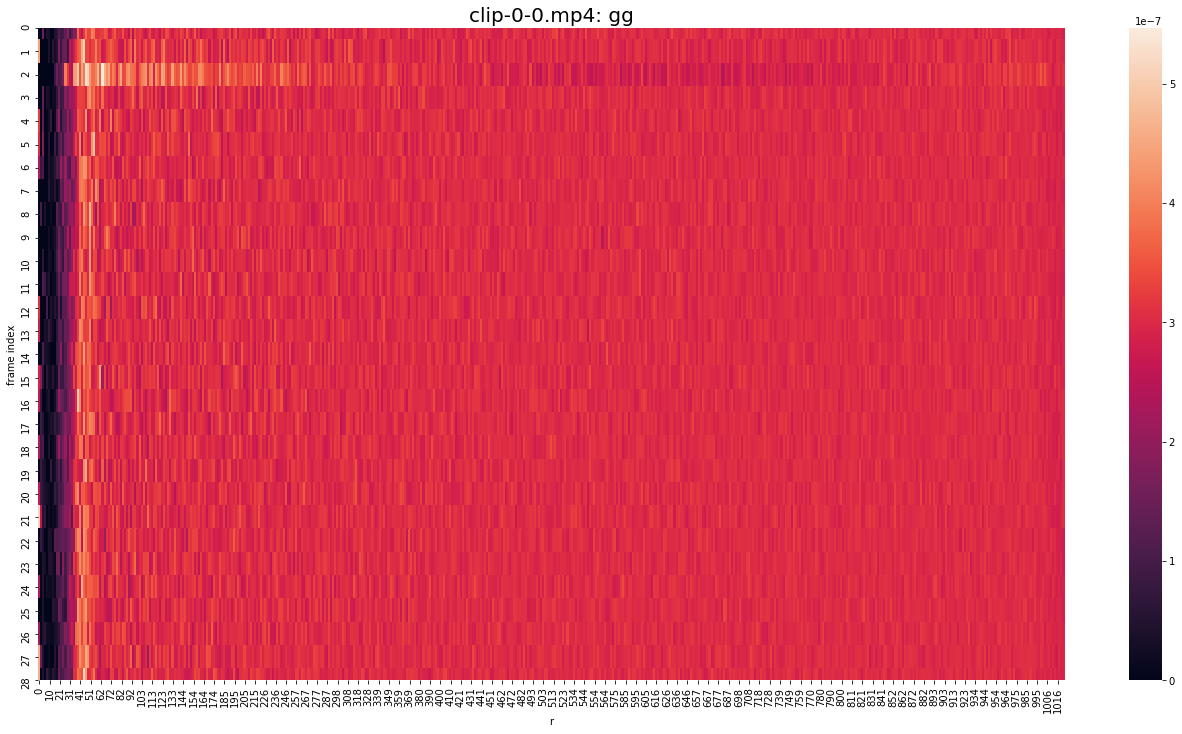

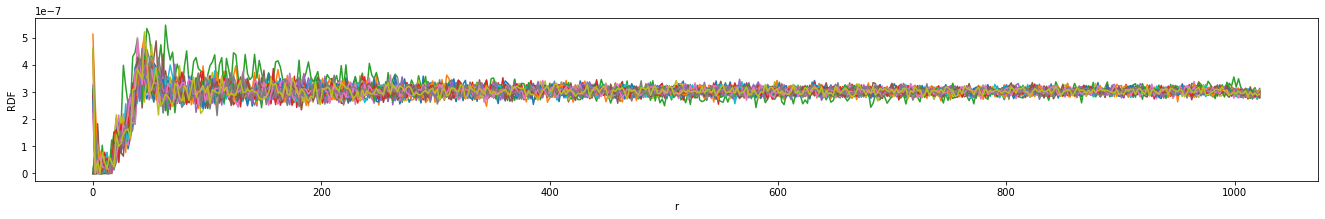

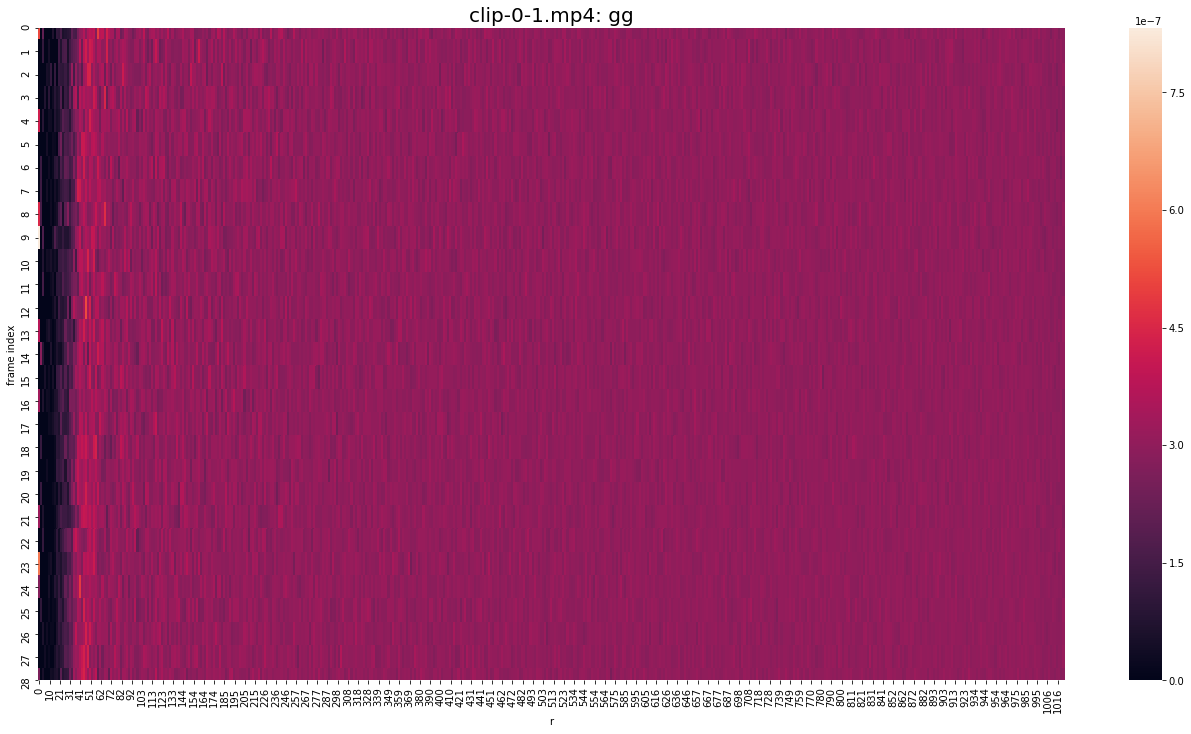

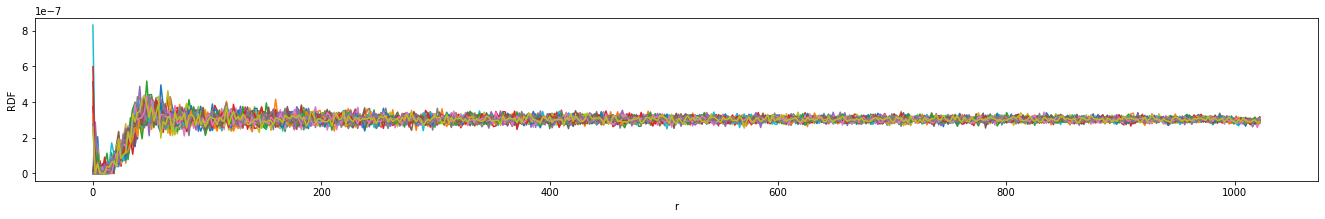

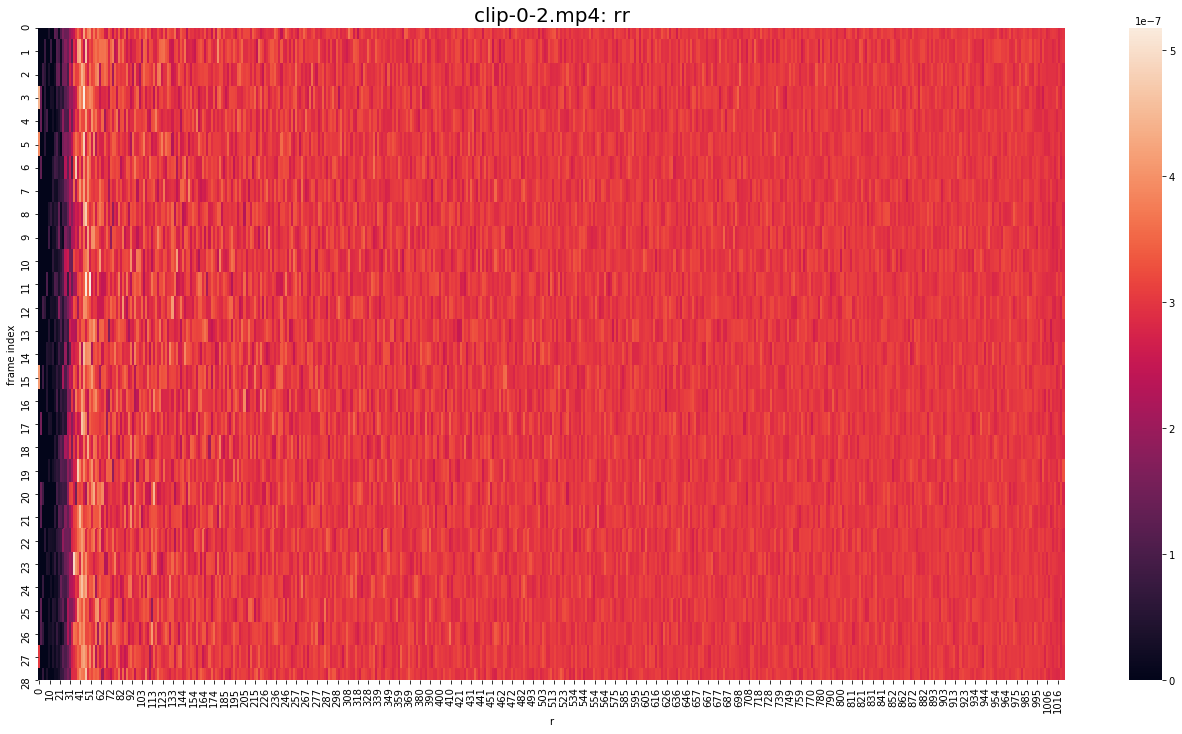

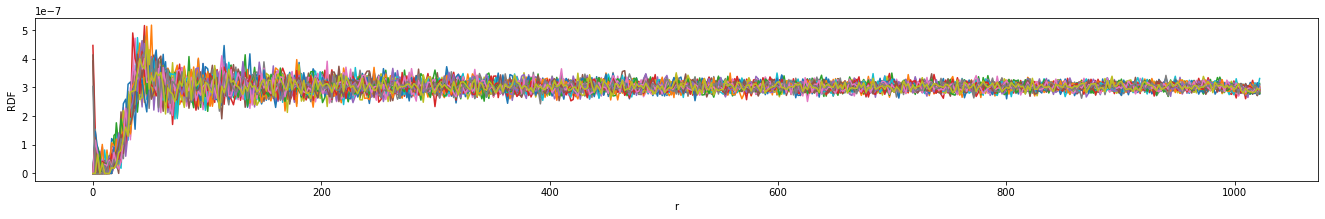

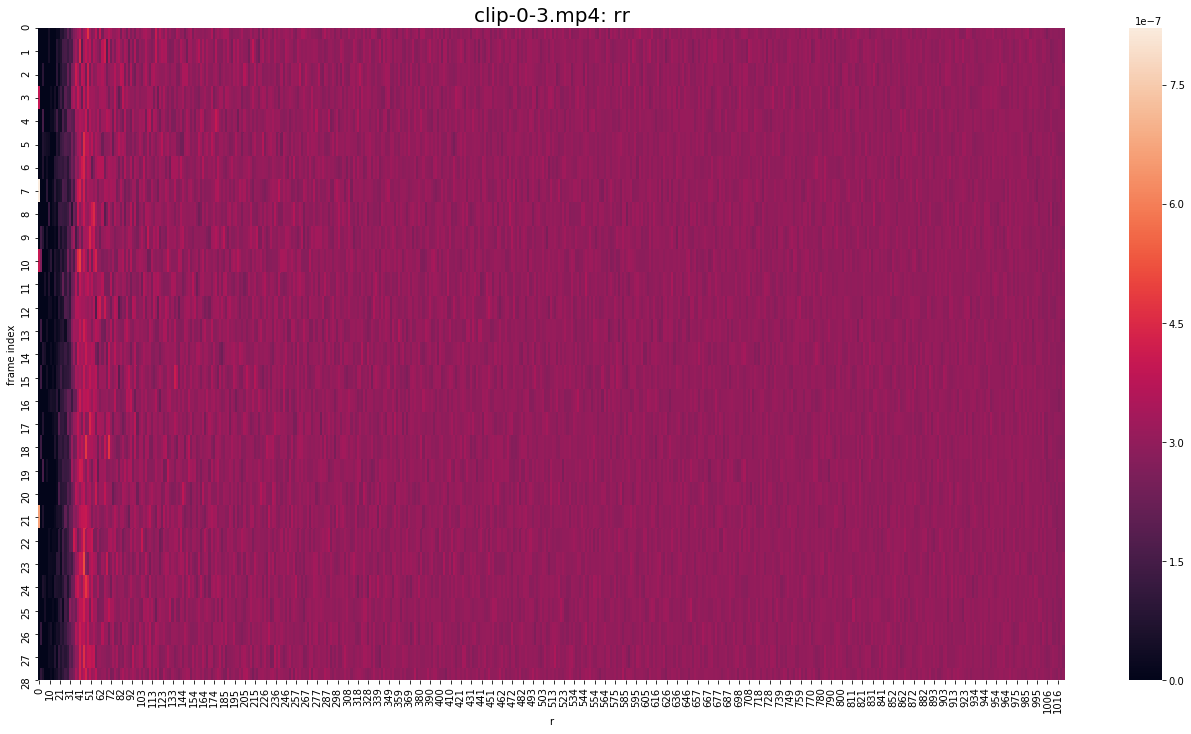

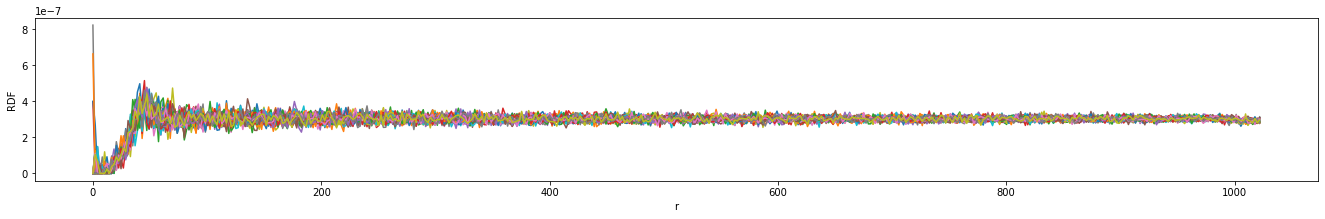

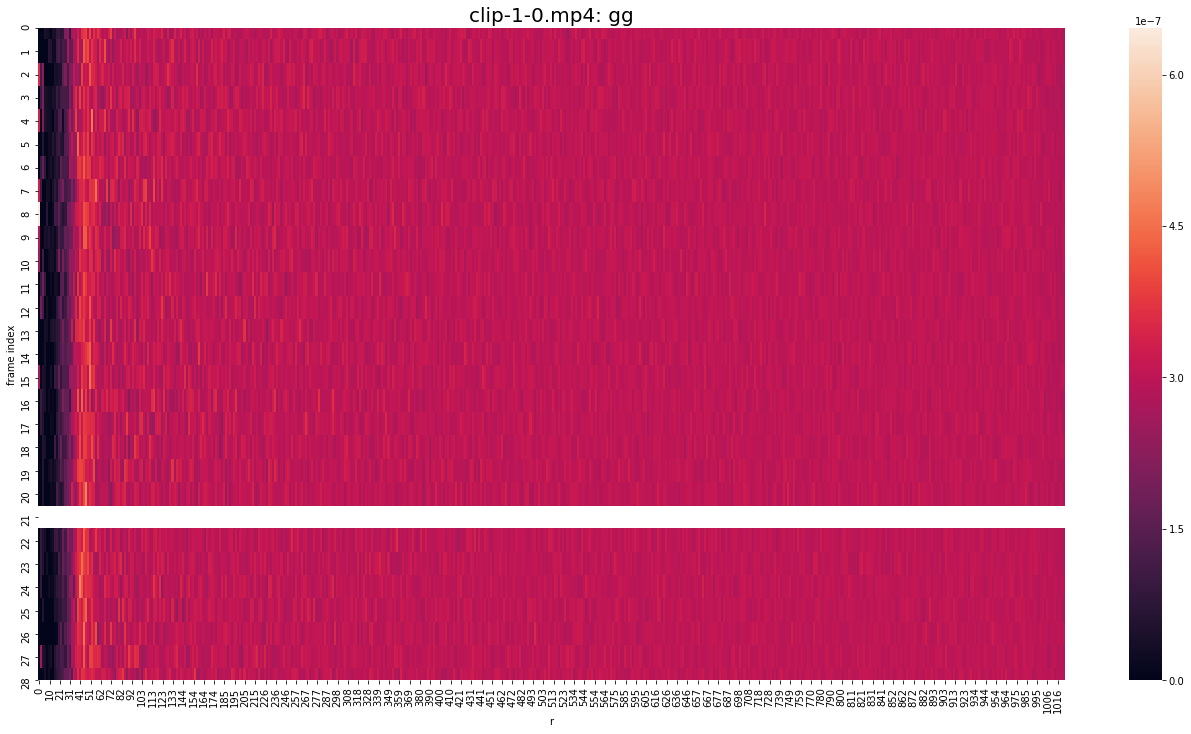

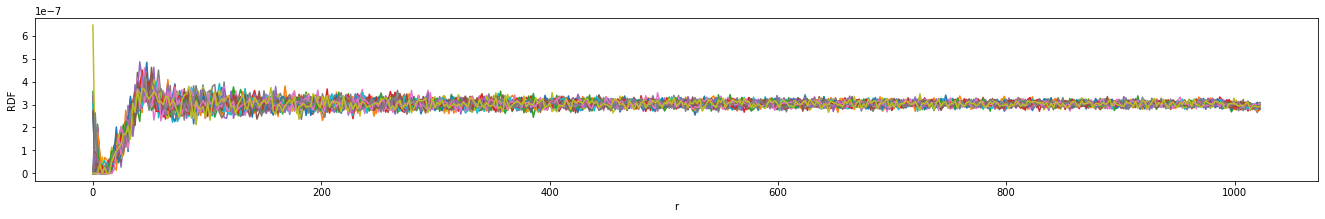

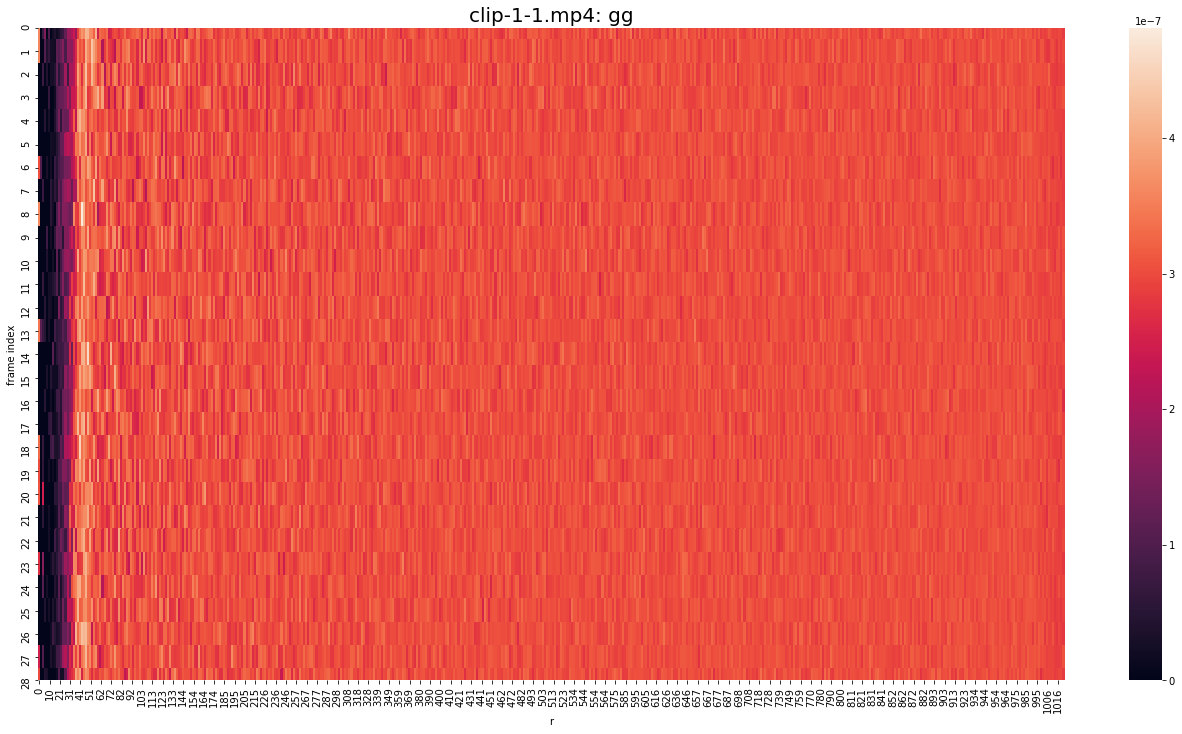

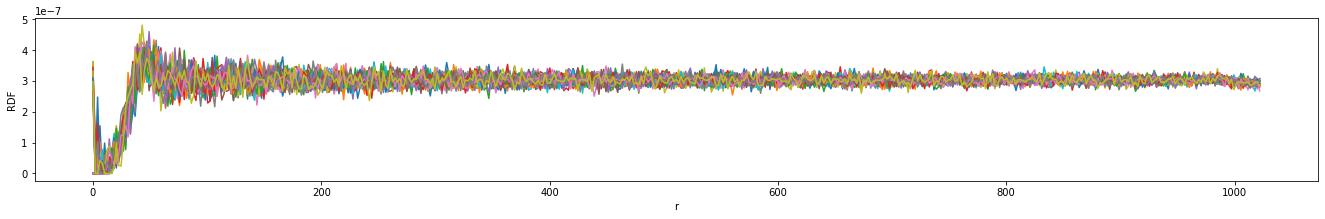

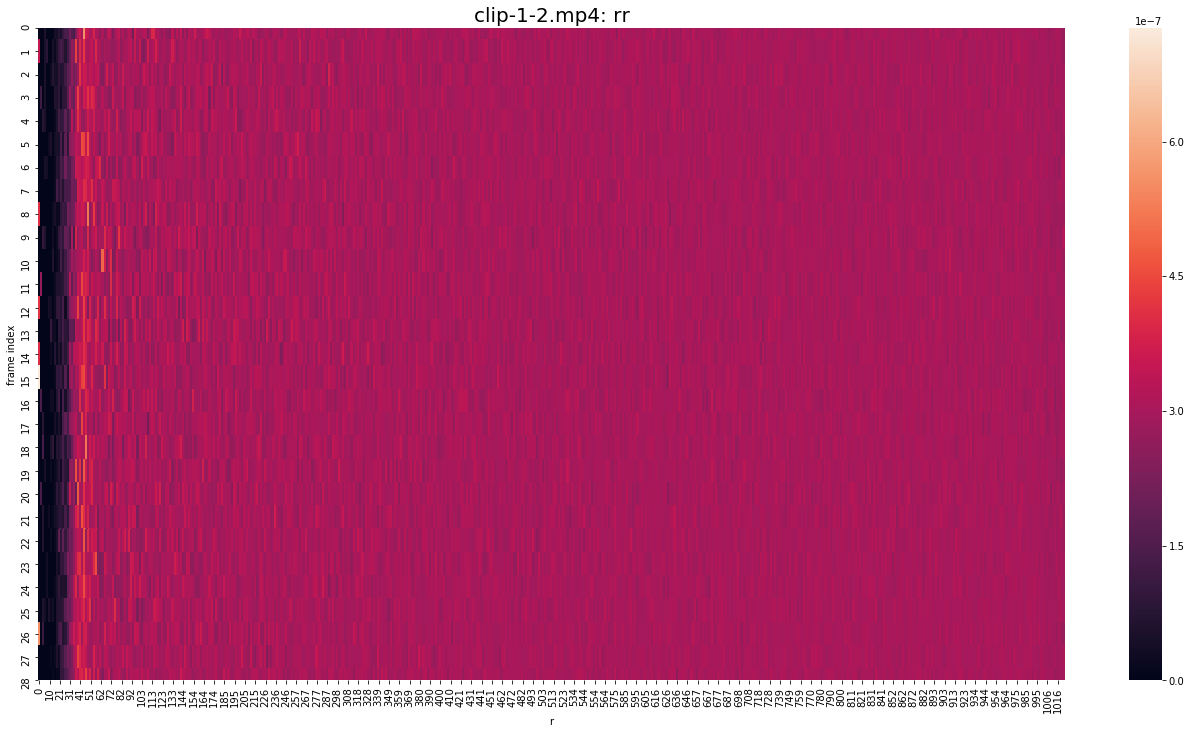

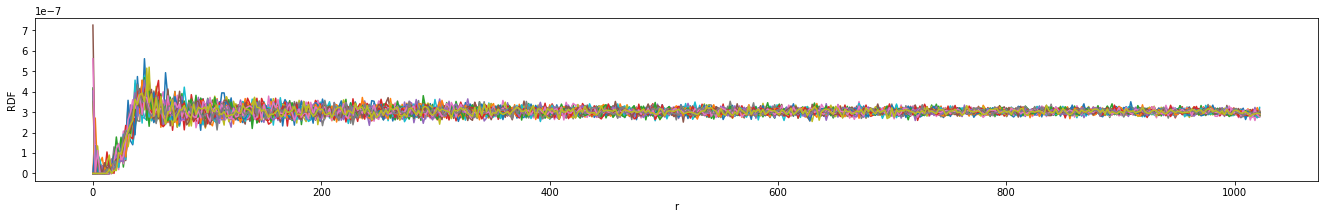

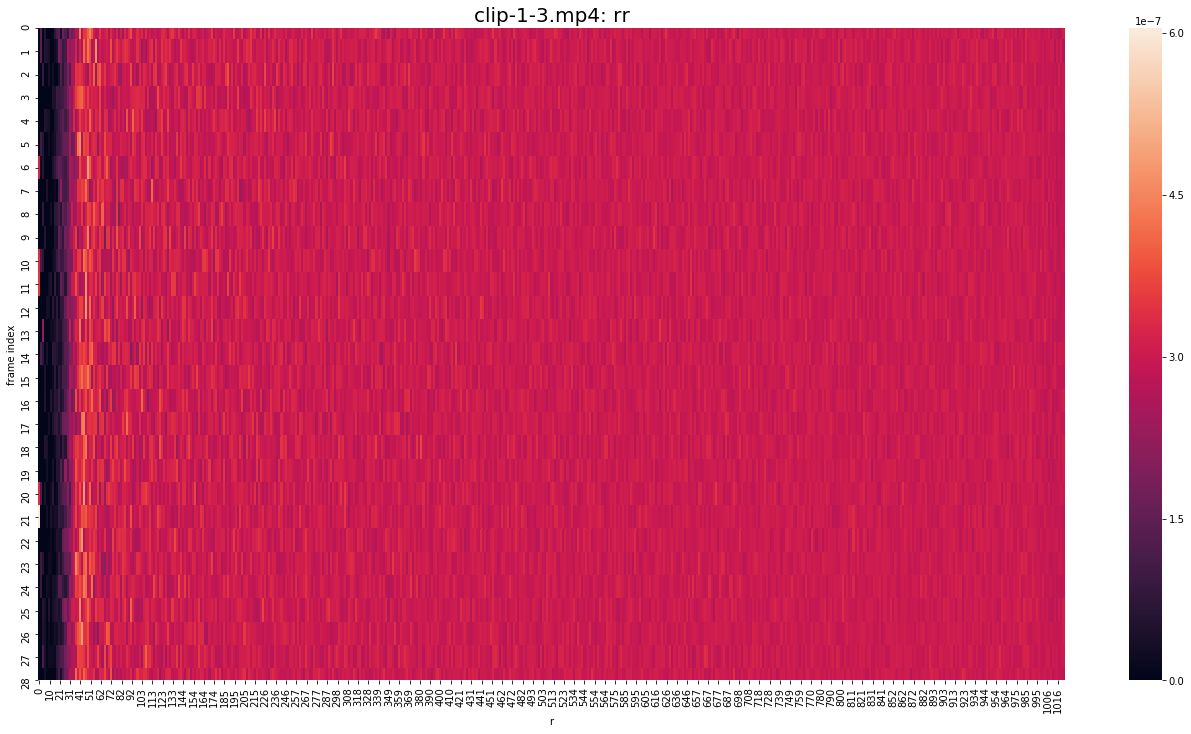

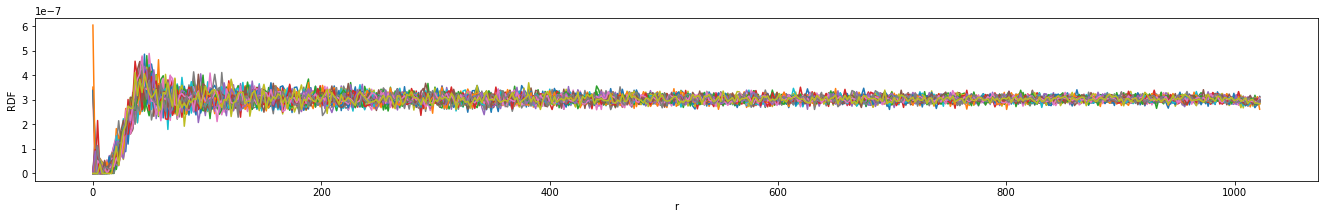

In [5]:
from flowermodel.plotting import plot_rdf_heatmap, plot_rdfs

moviefile = '41586_2019_1429_MOESM2_ESM.mov.clips'
data_path = '/projects/chuang-lab/jnh/flower/data'

for idx1 in range(2):
    for idx2 in range(4):
        clip = 'clip-{}-{}.mp4'.format(idx1, idx2)

        rdf_file = glob.glob('{:s}/blobs/{:s}/{:s}.blob.rdf.color_??.csv'.format(data_path, moviefile, clip))[0]
        plot_rdf_heatmap(rdf_file)
        plt.title('{:s}: {:s}{:s}'.format(clip, rdf_file[-6], rdf_file[-5]), size=20)
        plot_rdfs(rdf_file)

# Scratch

In [17]:
rdffiles.sort_values(['maxrdf_loc', 'celltypes', 'color-pair'])

,rdffile,movfile,color-pair,celltypes,time,array_size,maxrdf_loc
14,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,gr,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",20.686869
1,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,rg,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",20.686869
6,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM4_ESM.mov,gr,hFwe1(GFP)-hFwe2(RFP),0-23.707hr,"(1024, 1024, 271)",20.686869
11,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM5_ESM.mov,gr,hFwe1(GFP)-hFwe2(RFP),:10-26:18hr,"(1024, 1024, 262)",20.686869
2,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM4_ESM.mov,rg,hFwe1(GFP)-hFwe2(RFP),0-23.707hr,"(1024, 1024, 271)",20.686869
15,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM5_ESM.mov,rg,hFwe1(GFP)-hFwe2(RFP),:10-26:18hr,"(1024, 1024, 262)",20.686869
3,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM3_ESM.mov,gr,hFwe1(GFP)-hFwe1(RFP),0-23.707hr,"(1024, 1024, 378)",31.030303
13,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM3_ESM.mov,rg,hFwe1(GFP)-hFwe1(RFP),0-23.707hr,"(1024, 1024, 378)",31.030303
5,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,gg,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",41.373737
10,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,rr,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",41.373737


In [36]:
moviefile = '41586_2019_1429_MOESM2_ESM.mov.clips'
data_path = '/projects/chuang-lab/jnh/flower/data'
clipfile = 'clip-{}-{}.mp4'.format(idx1, idx2)

rdfobj = vidrdf(data_path, os.path.join(moviefile, clipfile), nbins=500, shellwidth=5)
rdfobj.get_rdfs_for_all_colorpairs()



100%|██████████| 29/29 [01:06<00:00,  2.30s/it]


In [55]:
rdf_file = rdffiles['rdffile'].iloc[0]
rdf = pd.read_csv(rdf_file, index_col=0)
tmp = rdf.sum()
tmp.index = tmp.index.astype(float)
np.diff(tmp.index)

array([10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34

In [11]:
vid = imageio.get_reader(filename,  'ffmpeg')

In [12]:
img_idx = 0
# img = fb.get_image(vid, img_idx)
img = vid.get_data(img_idx)

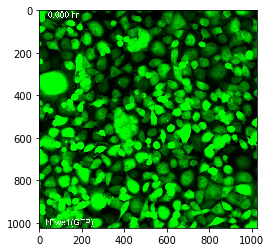

In [13]:
plt.imshow(img)

In [2]:
!flowermodel framecount --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM8_ESM.mov

34


In [11]:
%%bash
idx=8
flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM${idx}_ESM.mov --jobname blob${idx}

qsub blob${idx}.pbs

10553235[].helix-master


In [4]:
from moviepy.editor import VideoFileClip
from flowermodel import util
import os

filename = '/projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov'
clip = VideoFileClip(filename)

(nrows, ncols) = (2,4)
L = clip.get_frame(0).shape[0]//nrows

clipspath = filename+'.clips'
util.mkdir_if_not_exist(clipspath)

for i in range(nrows):
    for j in range(ncols):
        clipname = 'clip-{:d}-{:d}.mp4'.format(i, j)
        print('Analyzing ', clipname)        
        clipfile = os.path.join(clipspath, clipname)

        croppedclip = clip.crop(y1=i*L, x1=j*L, width=L, height=L)       
        croppedclip.write_videofile(clipfile)

t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Analyzing  clip-0-0.mp4
Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4
Analyzing  clip-0-1.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4
Analyzing  clip-0-2.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4
Analyzing  clip-0-3.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4
Analyzing  clip-1-0.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4
Analyzing  clip-1-1.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4
Analyzing  clip-1-2.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4
Analyzing  clip-1-3.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4
